### Importando pacotes e base de dados:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
!pip install seaborn==0.11.0
import seaborn as sns

In [3]:
sns.__version__

'0.11.0'

In [4]:
fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"
dados = pd.read_csv(fonte)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,A,B,A,A,D,A,A,B


# Desafio - Dia 01:

**1**: Proporção dos inscritos por idade.

**2**: Descobrir de quais estados são os inscritos com 13 anos.

**3**: Adicionar título no gráfico.

**4**: Plotar os histogramas das idades do treineiro e não treineiros.

**5**: Comparar as distribuições das provas em inglês e espanhol.

**6**: Explorar a documentação e visualizações com matplotlib ou pandas e gerar novas visualizações.

### 1 - Proporção dos inscritos por idade:

In [5]:
idade_normalizada = dados['NU_IDADE'].value_counts(normalize=True).sort_index()*100
idade_normalizada = pd.DataFrame({'Proporção (%)': idade_normalizada})
idade_normalizada.rename_axis('Idade', inplace=True)
idade_normalizada

,Proporção (%)
Idade,
13,0.003140
14,0.110692
15,1.577171
16,6.146962
17,16.687078
...,...
73,0.001570
75,0.001570
76,0.000785


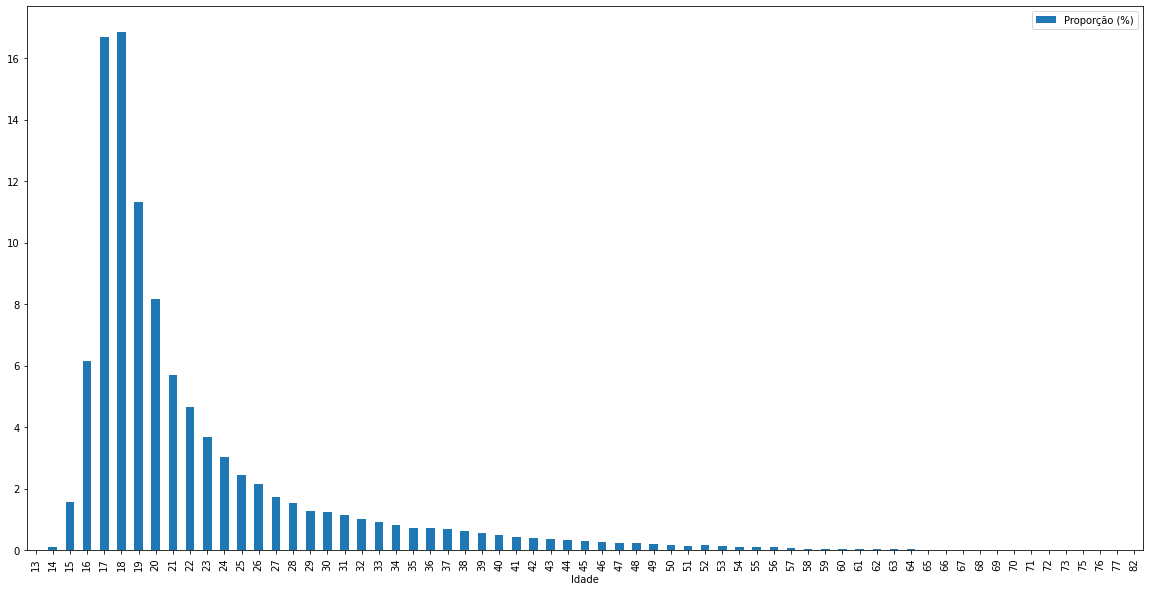

In [6]:
idade_normalizada.plot.bar(y='Proporção (%)', figsize=(20,10))

In [7]:
idade_normalizada.loc[17][0].round(2)

16.69

In [8]:
idade_normalizada.loc[18][0].round(2)

16.84

In [9]:
idade_normalizada.loc[19][0].round(2)

11.32

In [10]:
grupo_181719 = (idade_normalizada.loc[17][0]+idade_normalizada.loc[18][0]+idade_normalizada.loc[19][0]).round(2)
grupo_181719

44.85

Os candidatos com 18, 17 e 19 anos representam, respectivamente, 16,84%, 16,68% e 11,31% da amostra selecionada. Esse grupo representa em conjunto 44,85% da amostra.

### 2 - Descobrir de quais estados são os inscritos com 13 anos:

In [11]:
dados.query("NU_IDADE == 13")["SG_UF_RESIDENCIA"]

57359     SP
95630     MT
98197     AP
116501    BA
Name: SG_UF_RESIDENCIA, dtype: object

Os inscritos com 13 anos nessa amostra são de Amapá, Bahia, Mato Grosso e São Paulo.

### 3 - Adicionar título aos gráficos:

Text(0.5, 1.0, 'Frequência da Idade dos candidatos da amostra')

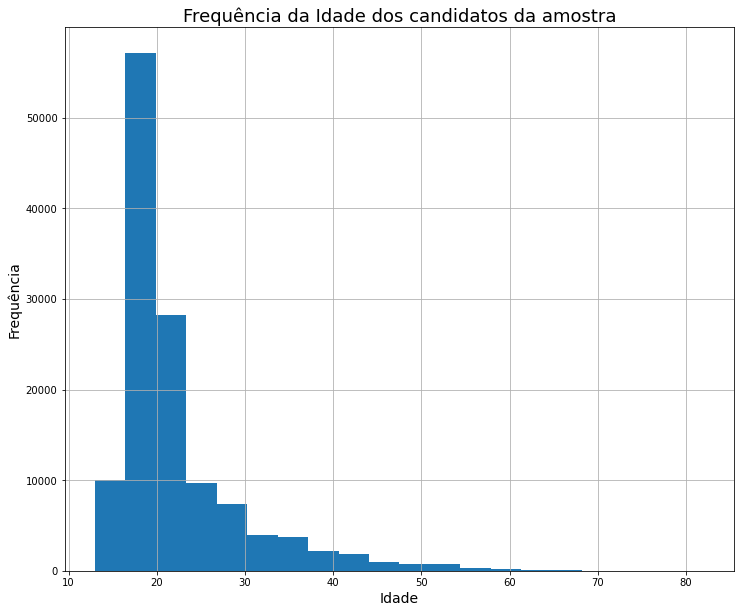

In [12]:
dados["NU_IDADE"].hist(bins=20, figsize=(12,10))
plt.xlabel('Idade', fontdict={'fontsize':14})
plt.ylabel('Frequência', fontdict={'fontsize':14})
plt.title('Frequência da Idade dos candidatos da amostra', fontdict={'fontsize':18})

Text(0.5, 1.0, 'Distribuição das notas dos candidatos da amostra')

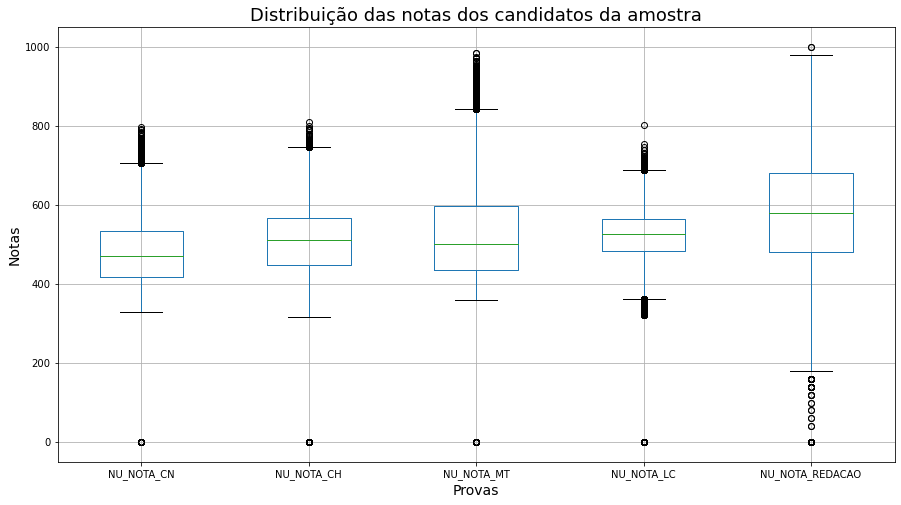

In [13]:
provas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO"]
dados[provas].plot.box(grid=True, figsize=(15,8)) 
plt.xlabel('Provas', fontdict={'fontsize':14})
plt.ylabel('Notas', fontdict={'fontsize':14})
plt.title('Distribuição das notas dos candidatos da amostra', fontdict={'fontsize':18})

Text(0.5, 1.0, 'Proporção das notas dos candidatos da amostra conforme idade')

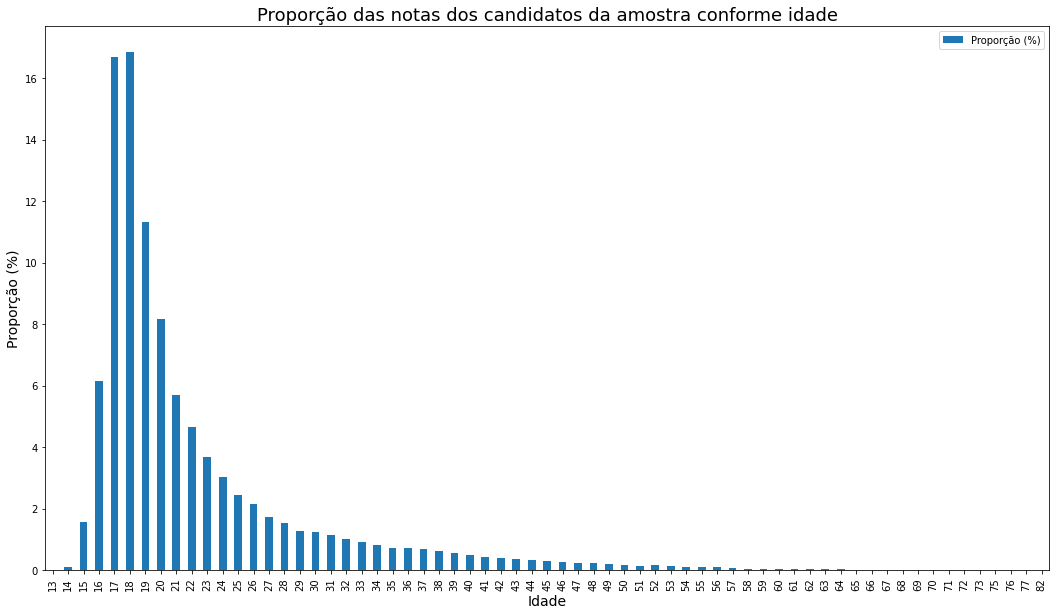

In [14]:
idade_normalizada.plot.bar(y='Proporção (%)', figsize=(18,10))
plt.xlabel('Idade', fontdict={'fontsize':14})
plt.ylabel('Proporção (%)', fontdict={'fontsize':14})
plt.title('Proporção das notas dos candidatos da amostra conforme idade', fontdict={'fontsize':18})

### 4 - Plotar os histogramas das idades do treineiro e não treineiros:

In [15]:
dados.query("IN_TREINEIRO == 1")["NU_IDADE"].value_counts().sort_index()

14      64
15    1927
16    7142
17    4901
18     858
19     228
20      83
21      44
22      30
23      21
24      13
25       8
26      13
27       9
28       6
29      10
30       4
31       4
32       2
33       1
34       3
35       2
36       2
37       1
38       4
39       2
40       4
41       1
42       4
44       2
45       1
46       2
47       1
48       1
51       1
55       1
62       1
Name: NU_IDADE, dtype: int64

Text(0.5, 1.0, 'Frequência da Idade dos candidatos da amostra - Treineiros')

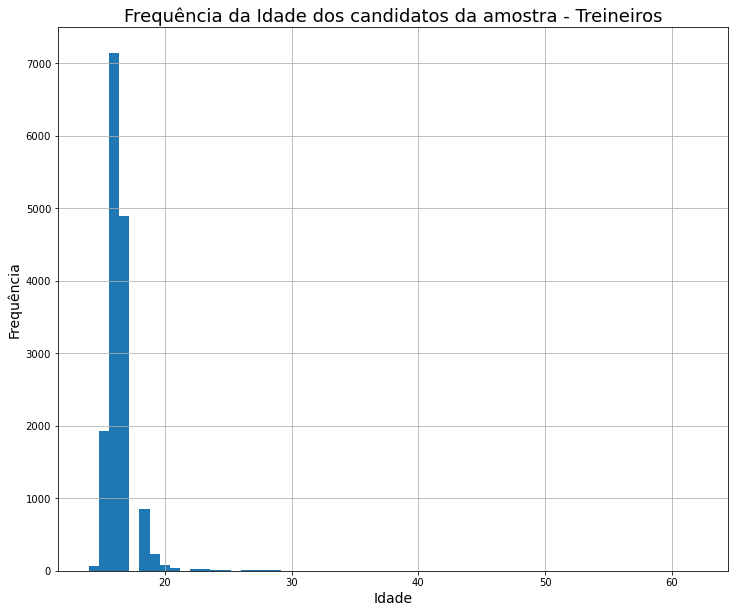

In [16]:
dados.query("IN_TREINEIRO == 1")["NU_IDADE"].hist(bins=60, figsize=(12,10))
plt.xlabel('Idade', fontdict={'fontsize':14})
plt.ylabel('Frequência', fontdict={'fontsize':14})
plt.title('Frequência da Idade dos candidatos da amostra - Treineiros', fontdict={'fontsize':18})

In [17]:
dados.query("IN_TREINEIRO == 0")["NU_IDADE"].value_counts().sort_index()

13        4
14       77
15       82
16      688
17    16355
      ...  
73        2
75        2
76        1
77        1
82        1
Name: NU_IDADE, Length: 65, dtype: int64

Text(0.5, 1.0, 'Frequência da Idade dos candidatos da amostra - Não Treineiros')

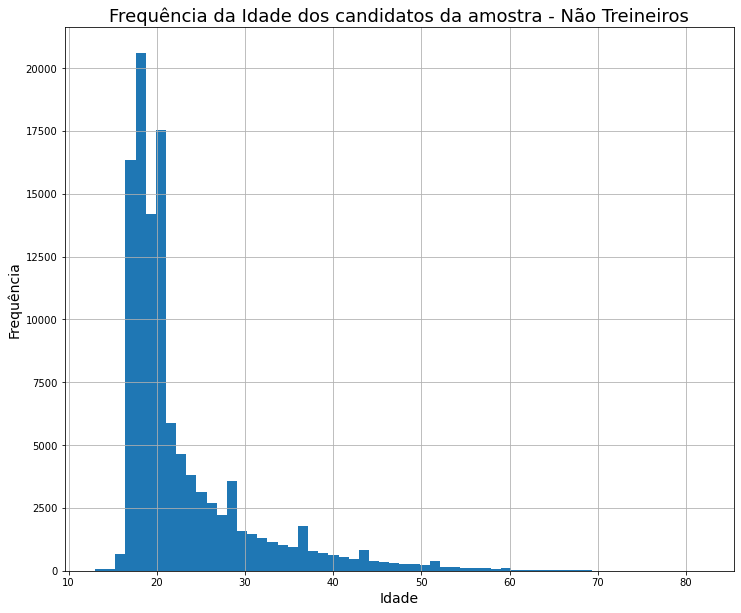

In [18]:
dados.query("IN_TREINEIRO == 0")["NU_IDADE"].hist(bins=60, figsize=(12,10))
plt.xlabel('Idade', fontdict={'fontsize':14})
plt.ylabel('Frequência', fontdict={'fontsize':14})
plt.title('Frequência da Idade dos candidatos da amostra - Não Treineiros', fontdict={'fontsize':18})

As idades dos candidatos treineiros mais frequentes nessa amostra estão entre 15 e 17 anos. Quanto à candidatos não treineiros, as idades mais frequentes nessa amostra estão entre 17 e 21 anos.

### 5 - Comparar as distribuições das provas em inglês e espanhol:

Text(0.5, 1.0, 'Distribuição das notas dos candidatos que escolheram fazer a prova de inglês')

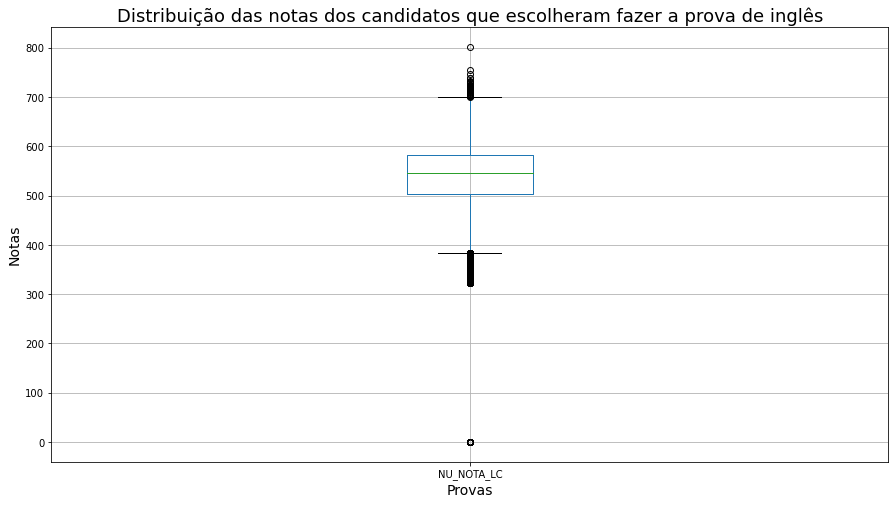

In [19]:
dados.query("TP_LINGUA == 0")['NU_NOTA_LC'].plot.box(grid=True, figsize=(15,8))

plt.xlabel('Provas', fontdict={'fontsize':14})
plt.ylabel('Notas', fontdict={'fontsize':14})
plt.title('Distribuição das notas dos candidatos que escolheram fazer a prova de inglês', fontdict={'fontsize':18})

Text(0.5, 1.0, 'Distribuição das notas dos candidatos que escolheram fazer a prova de espanhol')

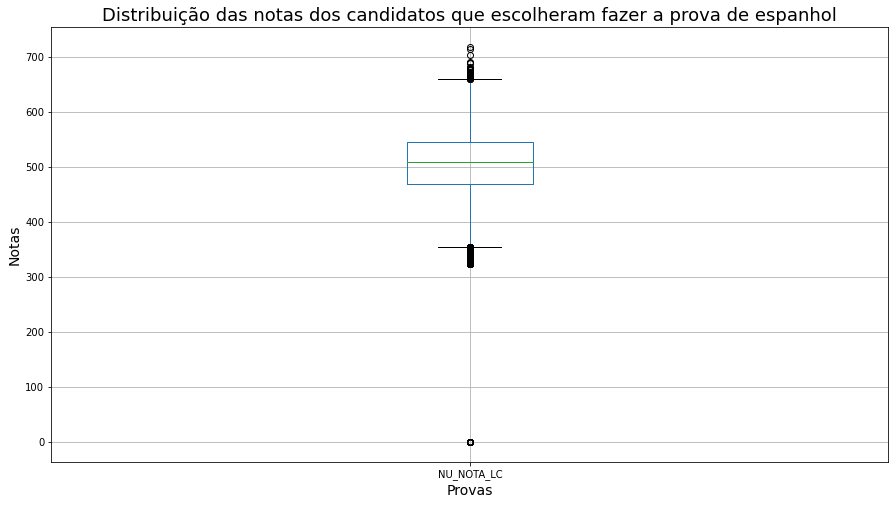

In [20]:
dados.query("TP_LINGUA == 1")['NU_NOTA_LC'].plot.box(grid=True, figsize=(15,8))

plt.xlabel('Provas', fontdict={'fontsize':14})
plt.ylabel('Notas', fontdict={'fontsize':14})
plt.title('Distribuição das notas dos candidatos que escolheram fazer a prova de espanhol', fontdict={'fontsize':18})

Segundo os gráficos que mostram as distribuições das notas, os candidatos que escolheram a prova de inglês acertaram mais questões do que os alunos que escolheram a prova de espanhol.

# Desafio - Dia 02:

**MEGA DESAFIO**: Pegar a amostra completa dos alunos de 13 e 14 anos e verificar os estados.

**1**: Aumentar a amostra para alunos menores de idade e comparar proporção por estados.

**2**: Criando uma função que plota boxplot.

**3**: Verificar se quem zerou a prova foi eliminado ou não estava presente.

**4**: Quem é eliminado tira zero ou será NaN?

**5**: Verificar a proporção dos participantes de rendas mais altas e mais baixas como treineiro e não treineiro.

**6**: Fazer o mesmo boxplot olhando para a questão 25 (tem internet ou não) e fazer uma reflexão sobre o assunto e o contexto da pandemia.

### 1 - Aumentar a amostra para alunos menores de idade e comparar proporção por estados:

In [21]:
alunos_menores = dados.query("NU_IDADE < 18")
alunos_menores["SG_UF_RESIDENCIA"].value_counts(normalize=True)*100

SP    23.434699
MG    10.070423
BA     6.379641
CE     6.251601
PE     5.777849
PR     5.646607
RJ     5.284891
PA     4.058899
GO     3.838028
MA     3.725992
RS     3.169014
PB     2.682458
SC     2.544814
PI     2.170294
MT     1.959027
ES     1.654930
DF     1.510883
AL     1.427657
RN     1.373239
AM     1.370038
MS     1.347631
SE     1.296415
TO     1.101152
RO     0.749040
AP     0.601793
AC     0.348912
RR     0.224072
Name: SG_UF_RESIDENCIA, dtype: float64

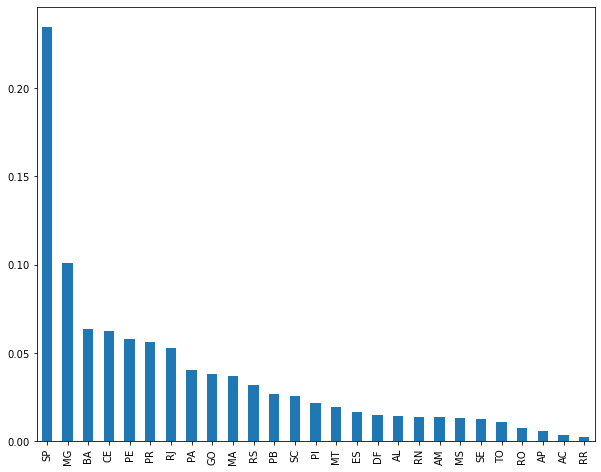

In [22]:
alunos_menores["SG_UF_RESIDENCIA"].value_counts(normalize=True).plot.bar(figsize=(10,8))

Os três estados com maior número de candidatos menores de idade, isto é, com idade menor que 18 anos, são São Paulo, Minas Gerais, Bahia que correspondem respectivamente a 23,43%, 10,07%, 6,37%. Os estados com menor número de candidatos menores de idade na amostra são Amapá, Acre e Roraima são 0,60%, 0,34% e 0,22%, respectivamente.

### 2 - Criando uma função que plota boxplot:

In [23]:
renda_ordenada = dados["Q006"].unique() # Criando uma lista com faixas de renda ordenadas para serem incluídas na função.
renda_ordenada.sort()
renda_ordenada

def boxplot(x, y, data, order):
    plt.figure(figsize=(12,8))
    sns.boxplot(x=x, y=y, data=data, order=order)

In [24]:
provas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO"]
dados[provas].sum(axis=1) # Somando a nota das provas para cada candidato (cada linha).
dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis=1) # Incluindo a coluna de soma das notas na base.

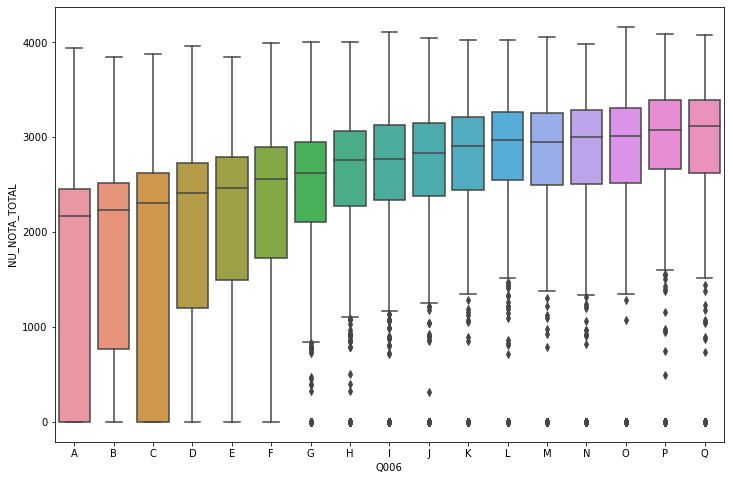

In [25]:
boxplot(x='Q006', y='NU_NOTA_TOTAL', data=dados, order=renda_ordenada) # Testando a função.

Duas coisas são importantes de se notar no gráfico da distribuição das notas conforme a renda. A primeira é que as notas aumentam conforme a renda aumenta, isto é, a desigualdade de renda no presente pode gerar desigualdade de renda no futuro se considerarmos que as pessoas mais bem colocadas têm mais chances de serem selecionadas para as universidades e se uma boa formação no presente gera uma renda elevada no futuro. A segunda informação importante que pode ser extraída desse gráfico é que o valor 0 está entre os 25% e 75% valores mais frequentes da soma total das notas paras as classes A e C. É necessário investigar o que está acontecendo nessas faixas de renda. 

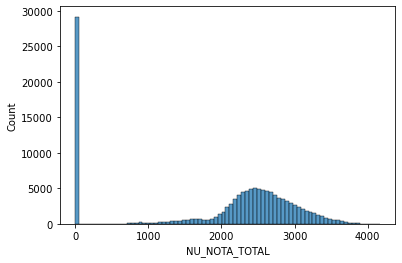

In [26]:
sns.histplot(dados['NU_NOTA_TOTAL'])

In [27]:
provas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO"]
provas.append("NU_NOTA_TOTAL") # incluindo a nota total na lista de notas de provas.
dados[provas].query("NU_NOTA_TOTAL == 0")

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL
10,NaN,NaN,NaN,NaN,NaN,0.0
11,NaN,NaN,NaN,NaN,NaN,0.0
26,NaN,NaN,NaN,NaN,NaN,0.0
38,NaN,NaN,NaN,NaN,NaN,0.0
40,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...
127351,NaN,NaN,NaN,NaN,NaN,0.0
127365,NaN,NaN,NaN,NaN,NaN,0.0
127366,NaN,NaN,NaN,NaN,NaN,0.0
127368,NaN,NaN,NaN,NaN,NaN,0.0


In [28]:
dados_sem_notas_zero = dados.query("NU_NOTA_TOTAL != 0")
dados_sem_notas_zero.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,B,A,C,A,B,B,2288.9
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,B,A,A,B,A,A,B,1184.6
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,B,A,B,B,A,A,B,2350.5
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,B,A,A,B,A,A,B,2555.7
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,B,A,A,D,A,A,B,2803.5


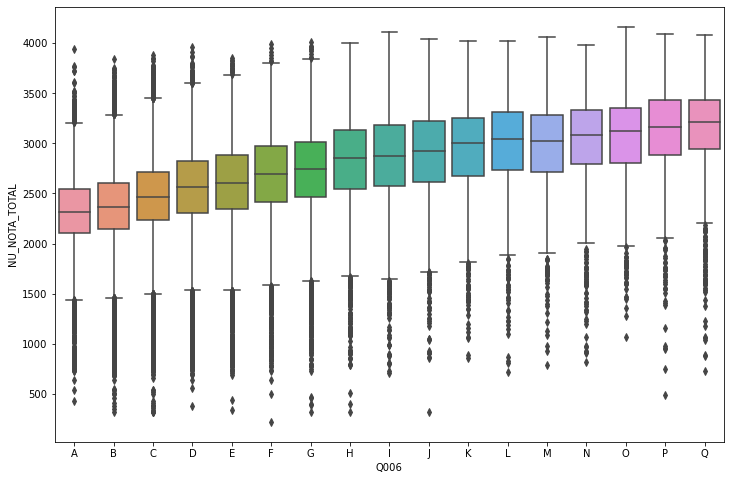

In [29]:
boxplot(x='Q006', y='NU_NOTA_TOTAL', data=dados_sem_notas_zero, order=renda_ordenada)

Sem os dados de quem zerou todas as provas, as distribuições das notas totais das classes mais baixas subiram. No entanto, o padrão visualizado no gráfico anterior permanece: quanto mais baixa a renda de um candidato, menor é sua nota. 

### 3 - Verificar se quem zerou a prova foi eliminado ou não estava presente:

In [30]:
dados_com_zero = dados.query("NU_NOTA_TOTAL == 0")
dados_com_zero.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
10,190001005028,2019,1506807,Santarém,15,PA,28,F,2,3,...,A,A,B,B,A,B,A,A,A,0.0
11,190001005057,2019,1501709,Bragança,15,PA,36,F,1,3,...,A,A,B,B,A,B,A,A,B,0.0
26,190001005484,2019,1504208,Marabá,15,PA,26,M,2,3,...,A,A,B,A,A,C,A,B,B,0.0
38,190001006086,2019,1508126,Ulianópolis,15,PA,29,F,1,3,...,A,A,B,B,A,C,A,A,B,0.0
40,190001006292,2019,1504422,Marituba,15,PA,24,M,1,1,...,A,A,B,A,A,D,A,A,B,0.0


In [31]:
dados_com_zero['TP_PRESENCA_CN'].value_counts(normalize=True)

0    0.999829
1    0.000171
Name: TP_PRESENCA_CN, dtype: float64

In [32]:
dados_com_zero['TP_PRESENCA_CH'].value_counts(normalize=True)

0    0.994479
2    0.004115
1    0.001406
Name: TP_PRESENCA_CH, dtype: float64

In [33]:
dados_com_zero['TP_PRESENCA_LC'].value_counts(normalize=True)

0    0.994479
2    0.004115
1    0.001406
Name: TP_PRESENCA_LC, dtype: float64

In [34]:
dados_com_zero['TP_PRESENCA_MT'].value_counts(normalize=True)

0    0.999829
1    0.000171
Name: TP_PRESENCA_MT, dtype: float64

Dentre os alunos cuja soma total das notas foi 0, 99,9% realmente não compareceram as provas de 'Ciências da Natureza e suas Tecnologias' e 'Matemática e suas Tecnologias', 99,4% nas provas de 'Ciências Humanas e suas Tecnologias' e 'Linguagens, Códigos e suas Tecnologias'. 0,4% foram eliminados nas provas de 'Ciências Humanas e suas Tecnologias' e 'Linguagens, Códigos e suas Tecnologias' e 0,1% estavam presentes na quatro provas.

### 4 - Quem é eliminado tira zero ou NaN?

In [35]:
dados_com_zero.query('TP_PRESENCA_CH == 2')[provas]

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL
77,NaN,NaN,NaN,NaN,NaN,0.0
396,NaN,NaN,NaN,NaN,NaN,0.0
446,NaN,NaN,NaN,NaN,NaN,0.0
609,NaN,NaN,NaN,NaN,NaN,0.0
728,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...
124695,NaN,NaN,NaN,NaN,NaN,0.0
125216,NaN,NaN,NaN,NaN,NaN,0.0
125784,NaN,NaN,NaN,NaN,NaN,0.0
126769,NaN,NaN,NaN,NaN,NaN,0.0


In [36]:
dados_com_zero.query('TP_PRESENCA_LC == 2')[provas]

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL
77,NaN,NaN,NaN,NaN,NaN,0.0
396,NaN,NaN,NaN,NaN,NaN,0.0
446,NaN,NaN,NaN,NaN,NaN,0.0
609,NaN,NaN,NaN,NaN,NaN,0.0
728,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...
124695,NaN,NaN,NaN,NaN,NaN,0.0
125216,NaN,NaN,NaN,NaN,NaN,0.0
125784,NaN,NaN,NaN,NaN,NaN,0.0
126769,NaN,NaN,NaN,NaN,NaN,0.0


As notas dos eliminados são NaN.

### 5 - Verificar a proporção dos participantes de rendas mais altas e mais baixas como treineiro e não treineiro.

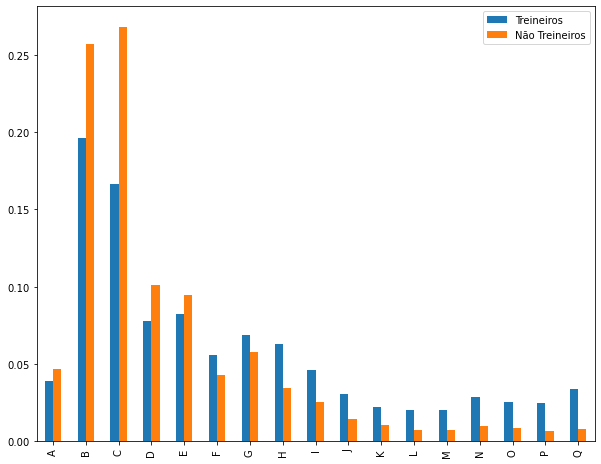

In [37]:
dados_treineiro = dados.query("IN_TREINEIRO ==1")['Q006'].value_counts(normalize=True)
dados_nao_treineiro = dados.query("IN_TREINEIRO ==0")['Q006'].value_counts(normalize=True)

treineiros_df = pd.DataFrame({'Treineiros': dados_treineiro,
                              'Não Treineiros': dados_nao_treineiro})

treineiros_df.plot.bar(figsize=(10,8))

O gráfico acima indica que o número de candidatos não treineiros é maior nas classes sociais A, B, C, D e E (renda familiar abaixo de 2.495,00 reais). Entre as classes F, G, H, I, J, K, L, M, N, O, P, Q (renda familiar acima de 2.495,00 reais), há um número maior de candidatos treineiros. Como o exame para treineiros é pago, esse resultado pode estar ligado ao nível de renda familiar: se a renda é alta, a família detêm mais recursos que podem ser investidos em educação, especificamente no caso desse gráfico, os pais podem pagar para filhos que não estão no 3º ano do Ensino Médio fazerem a prova.

### 6 - Fazer o mesmo boxplot olhando para a questão 25 (tem internet ou não) e fazer uma reflexão sobre o assunto e o contexto da pandemia.

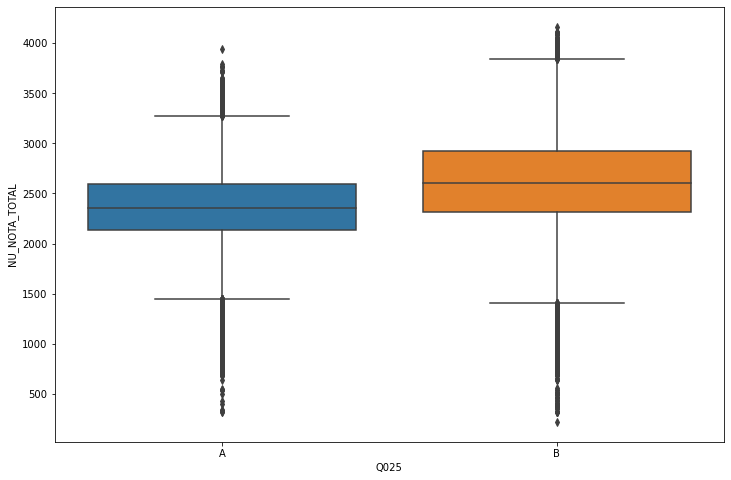

In [38]:
internet_ordenada = dados["Q025"].unique() # Criando uma lista com faixas de renda ordenadas para serem incluídas na função.
internet_ordenada.sort()
internet_ordenada

boxplot(x='Q025', y='NU_NOTA_TOTAL', data=dados_sem_notas_zero, order=internet_ordenada)

Segundo o resultado do gráfico que apresenta a distribuição das notas dos candidatos, as notas daqueles que têm acesso a internet são maiores do que os que não têm. Apesar dos dados serem do ENEM 2019, eles retratam uma questão importante para a aplicação nesse ano. Por conta da COVID-19, as aulas presenciais foram canceladas e adotou-se um estilo de estudo home office. No entanto, nem todos os alunos têm acesso a internet de qualidade que permita estudar dessa forma. Geralmente, esses alunos são de classes de renda mais baixas. Com isso, na aplicação desse ano pode ser que haja um reforço da desigualdade: pessoas com baixa renda têm internet de baixa qualidade, por conta disso se preparam mal para as provas e tiram notas menores comparado aos candidatos com renda familiar maior. Com notas menores, acabam entrando em faculdades piores ou nem entrando na graduação. Se considerarmos que o acesso ao terceiro grau de ensino é um fator que interfere na renda futura pode ser que a renda familiar desses candidatos que hoje tem renda baixa continue sendo baixa daqui a alguns anos.

# Desafio - Dia 03:

**1**: Plotar como linha vertical as médias, mediana e moda no gráfico de todas as notas.

**2**: Melhorar a visualização da matriz de correlação e analisar mais detalhadamente.

**3**: Filtrar as notas por seu estado ou cidade e refazer análises verificando se elas são semelhantes a análise da amostra com dados de todo o país.

**4**: Pensar sobre o que causa a correlação positiva entre notas de matemática e linguagens.

### 1 - Plotar como linha vertical as médias, mediana e moda no gráfico de todas as notas.

In [39]:
dados_sem_notas_zero[provas]

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL
0,435.6,512.3,432.4,488.6,420.0,2288.9
1,NaN,409.3,NaN,375.3,400.0,1184.6
2,423.2,499.1,427.2,441.0,560.0,2350.5
3,426.2,578.1,499.9,551.5,500.0,2555.7
4,516.5,571.3,424.5,511.2,780.0,2803.5
...,...,...,...,...,...,...
127375,502.4,559.6,539.7,525.7,740.0,2867.4
127376,449.1,380.9,418.2,450.3,520.0,2218.5
127377,NaN,516.0,NaN,497.9,440.0,1453.9
127378,564.7,416.2,455.7,517.3,620.0,2573.9


In [40]:
total_media = dados_sem_notas_zero['NU_NOTA_TOTAL'].mean()
total_mediana = dados_sem_notas_zero['NU_NOTA_TOTAL'].median()
total_moda = dados_sem_notas_zero['NU_NOTA_TOTAL'].mode()

In [41]:
total_media

2542.394274980138

In [42]:
total_mediana

2545.3

In [43]:
total_moda

0    2407.5
1    2457.0
2    2620.5
dtype: float64

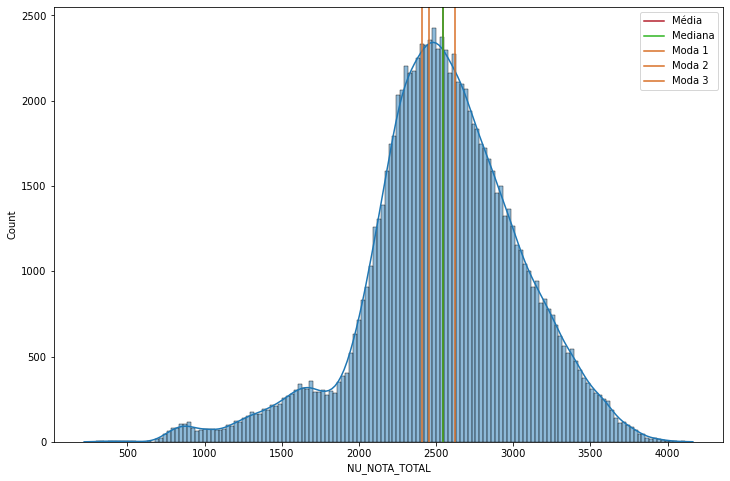

In [44]:
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_notas_zero['NU_NOTA_TOTAL'], kde=True)
plt.axvline(x=total_media, color='#B41F2C', label='Média')
plt.axvline(x=total_mediana, color='#2CB41F', label='Mediana')
plt.axvline(x=total_moda[0], color='#D86F25', label='Moda 1')
plt.axvline(x=total_moda[1], color='#D86F25', label='Moda 2')
plt.axvline(x=total_moda[2], color='#D86F25', label='Moda 3')
plt.legend()

A média das notas totais foi igual a 2542,3. O valor da média foi igual ao da mediana. Três valores são considerados como moda nessa variável, 2407,5, 2457,0, 2620,5, isto é, pode-se considerar essa variável como multimodal. Outro ponto interessante é que o formato do histograma é quase simétrico, fato que pode ser confirmado pelo valor igual entre média e mediana.

In [45]:
cn_media = dados_sem_notas_zero['NU_NOTA_CN'].mean()
cn_mediana = dados_sem_notas_zero['NU_NOTA_CN'].median()
cn_moda = dados_sem_notas_zero['NU_NOTA_CN'].mode()

In [46]:
cn_media

477.989780384459

In [47]:
cn_mediana

470.2

In [48]:
cn_moda

0    431.5
1    441.8
dtype: float64

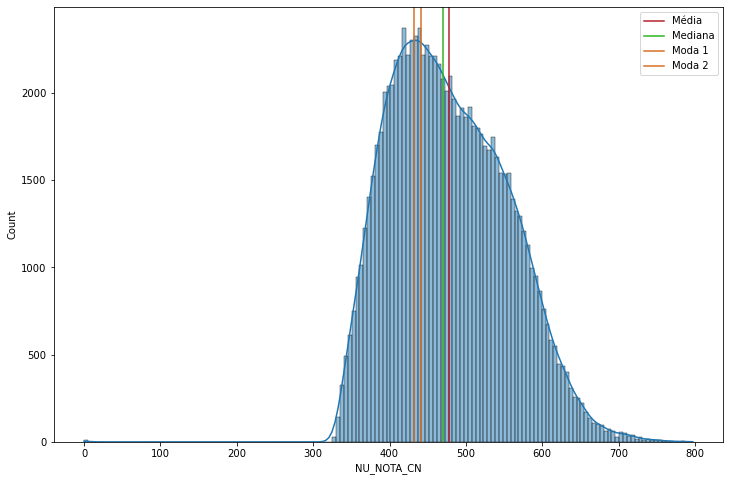

In [49]:
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_notas_zero['NU_NOTA_CN'], kde=True)
plt.axvline(x=cn_media, color='#B41F2C', label='Média')
plt.axvline(x=cn_mediana, color='#2CB41F', label='Mediana')
plt.axvline(x=cn_moda[0], color='#D86F25', label='Moda 1')
plt.axvline(x=cn_moda[1], color='#D86F25', label='Moda 2')
plt.legend()

A média das notas da prova de 'Ciência da Natureza e suas Tecnologias' foi igual a 477,96. O valor da mediana foi igual a 470,2. A variável apresenta dois valores para moda: 431,5 e 441,8. Como a média é maior que a mediana que é maior que a moda, pode-se dizer que a curva da distribuição é assimétrica à direita.

In [50]:
ch_media = dados_sem_notas_zero['NU_NOTA_CH'].mean()
ch_mediana = dados_sem_notas_zero['NU_NOTA_CH'].median()
ch_moda = dados_sem_notas_zero.query('NU_NOTA_CH != 0')['NU_NOTA_CH'].mode()

In [51]:
ch_media

507.57817289443165

In [52]:
ch_mediana

511.0

In [53]:
ch_moda

0    549.7
dtype: float64

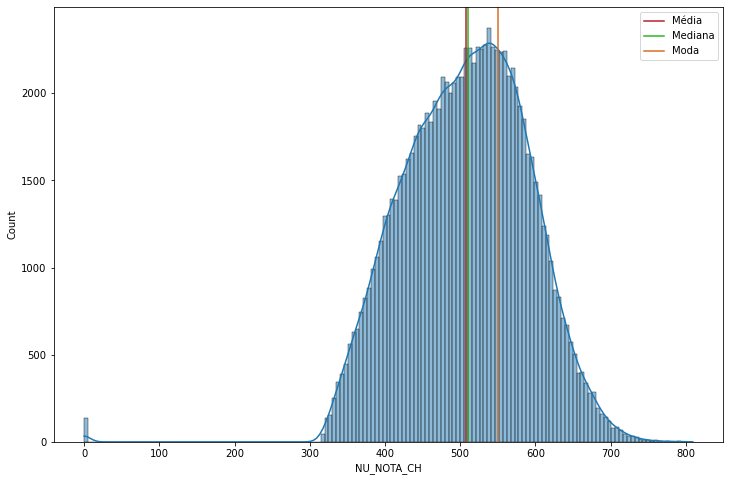

In [54]:
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_notas_zero['NU_NOTA_CH'], kde=True)
plt.axvline(x=ch_media, color='#B41F2C', label='Média')
plt.axvline(x=ch_mediana, color='#2CB41F', label='Mediana')
plt.axvline(x=ch_moda[0], color='#D86F25', label='Moda')
plt.legend()

A média das notas da prova de 'Ciência Humanas e suas Tecnologias' foi igual a 507,57. O valor da mediana foi igual a 511. O valor da moda foi igual a 549,7. O valor da média é menor que a mediana que é menor que a moda, pode-se dizer que a curva da distribuição é assimétrica à esquerda.

In [55]:
mt_media = dados_sem_notas_zero['NU_NOTA_MT'].mean()
mt_mediana = dados_sem_notas_zero['NU_NOTA_MT'].median()
mt_moda = dados_sem_notas_zero.query('NU_NOTA_MT != 0')['NU_NOTA_MT'].mode()

In [56]:
mt_media

523.5834291074179

In [57]:
mt_mediana

501.6

In [58]:
mt_moda

0    427.1
dtype: float64

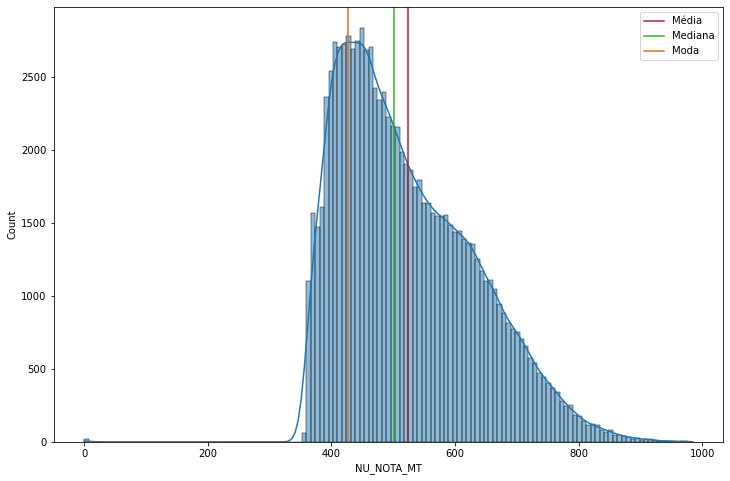

In [59]:
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_notas_zero['NU_NOTA_MT'], kde=True)
plt.axvline(x=mt_media, color='#B41F2C', label='Média')
plt.axvline(x=mt_mediana, color='#2CB41F', label='Mediana')
plt.axvline(x=mt_moda[0], color='#D86F25', label='Moda')
plt.legend()

A média das notas da prova de 'Matemática e suas Tecnologias' foi igual a 523,58. O valor da mediana foi igual a 501,6. O valor da moda foi igual a 427,1. Como a média é maior que a mediana que é maior que a moda, pode-se dizer que a curva da distribuição das notas dessa prova é assimétrica à direita.

In [60]:
lc_media = dados_sem_notas_zero['NU_NOTA_LC'].mean()
lc_mediana = dados_sem_notas_zero['NU_NOTA_LC'].median()
lc_moda = dados_sem_notas_zero.query('NU_NOTA_LC != 0')['NU_NOTA_LC'].mode()

In [61]:
lc_media

520.6816687414523

In [62]:
lc_mediana

526.1

In [63]:
lc_moda

0    528.5
dtype: float64

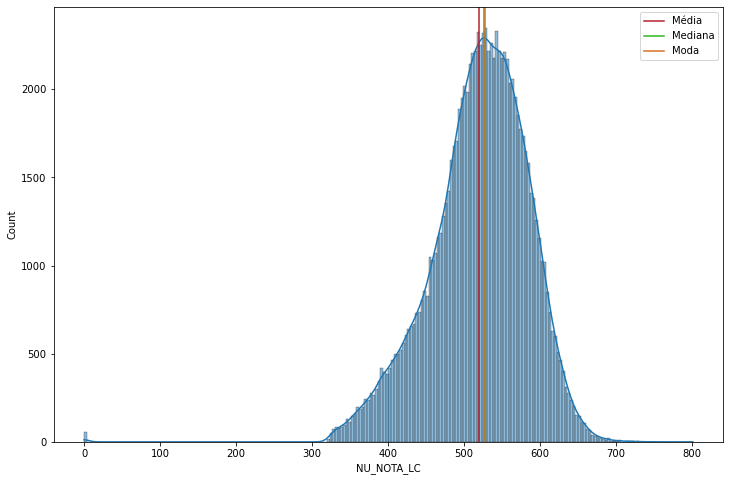

In [64]:
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_notas_zero['NU_NOTA_LC'], kde=True)
plt.axvline(x=lc_media, color='#B41F2C', label='Média')
plt.axvline(x=lc_mediana, color='#2CB41F', label='Mediana')
plt.axvline(x=lc_moda[0], color='#D86F25', label='Moda')
plt.legend()

A média das notas da prova de 'Linguagens, Códigos e suas Tecnologias' foi igual a 507,57. O valor da mediana foi igual a 511. O valor da moda foi igual a 549,7. O valor da média é menor que a mediana que é menor que a moda, pode-se dizer que a curva da distribuição é assimétrica à esquerda.

In [65]:
redacao_media = dados_sem_notas_zero['NU_NOTA_REDACAO'].mean()
redacao_mediana = dados_sem_notas_zero['NU_NOTA_REDACAO'].median()
redacao_moda = dados_sem_notas_zero['NU_NOTA_REDACAO'].mode()

In [66]:
redacao_media

571.8091467521072

In [67]:
redacao_mediana

580.0

In [68]:
redacao_moda

0    600.0
dtype: float64

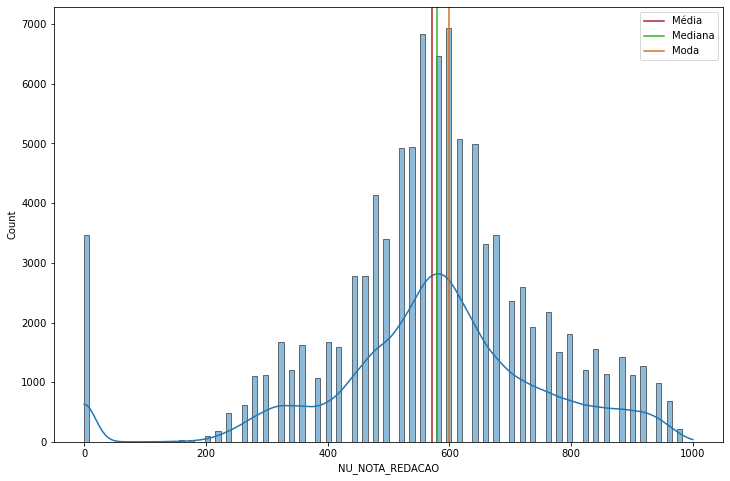

In [69]:
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_notas_zero['NU_NOTA_REDACAO'], kde=True)
plt.axvline(x=redacao_media, color='#B41F2C', label='Média')
plt.axvline(x=redacao_mediana, color='#2CB41F', label='Mediana')
plt.axvline(x=redacao_moda[0], color='#D86F25', label='Moda')
plt.legend()

A média das notas da prova da 'Redação' foi igual a 571,8. O valor da mediana foi igual a 580. O valor da moda foi igual a 600. Apesar de o valor da média ser menor que a mediana que tem valor menor que a moda, não é possível afirmar com certeza a forma que as notas se distribuem (simétrica, assimétrica à esquerda ou assimétrica a direita).

Um fato interessante de ser observado é que a distribuição das notas de  provas relacionadas às áreas humanas ('Linguagens e Códigos' e 'Ciências Humanas') é assimétrica à esquerda, o que indica que a frequência de notas altas é maior. Por outro lado, a distriuição das notas de provas relacionadas a área de ciências exatas e biológicas ('Matemática' e 'Ciências da Natureza') é assimétrica à direita, o que indica que poucas pessoas tiraram notas mais altas.

### 2 - Melhorar a visualização da matriz de correlação e analisar mais detalhadamente.

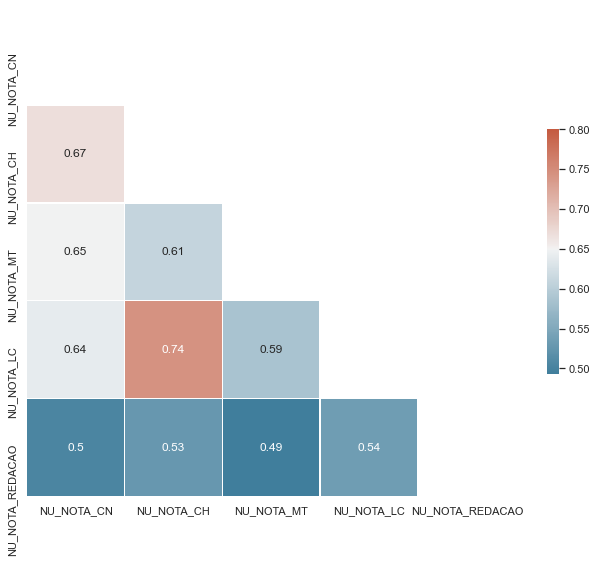

In [137]:
correlacao = dados_sem_notas_zero[provas].corr()

mask = np.triu(np.ones_like(correlacao, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(correlacao, mask=mask, cmap=cmap, vmax=0.8, center=0.65,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot= True)

As notas das provas de 'Linguagens e Códigos e suas Tecnologias' e 'Ciências Humanas e suas Tecnologias' apresentaram a maior correlação entre as provas (0.74). As notas da prova de 'Linguagens e Códigos e suas Tecnologias' e da Redação apresentaram a menor correlação (0.49). Esse resultado indica que quem tirou boas notas na prova de matemática não necessariamente fez uma excelente (correlação positiva) ou uma péssima (correlação negativa) redação, isto é, o fato de ser bom em matérias exatas não torna a redação de um indívíduo ruim, mas também não faz dela excelente.

### 3 - Filtrar as notas por seu estado ou cidade e refazer análises verificando se elas são semelhantes a análise da amostra com dados de todo o país.

#### Proporção de inscritos por idade:

In [72]:
idade_normalizada_mg = dados.query("SG_UF_PROVA == 'MG'")['NU_IDADE'].value_counts(normalize=True).sort_index()*100
idade_normalizada_mg = pd.DataFrame({'Proporção (%)': idade_normalizada_mg})
idade_normalizada_mg.rename_axis('Idade', inplace=True)
idade_normalizada_mg

,Proporção (%)
Idade,
14,0.081705
15,1.515264
16,6.113051
17,15.420040
18,17.455248
19,12.344945
20,8.467652
21,5.726807
22,4.701775


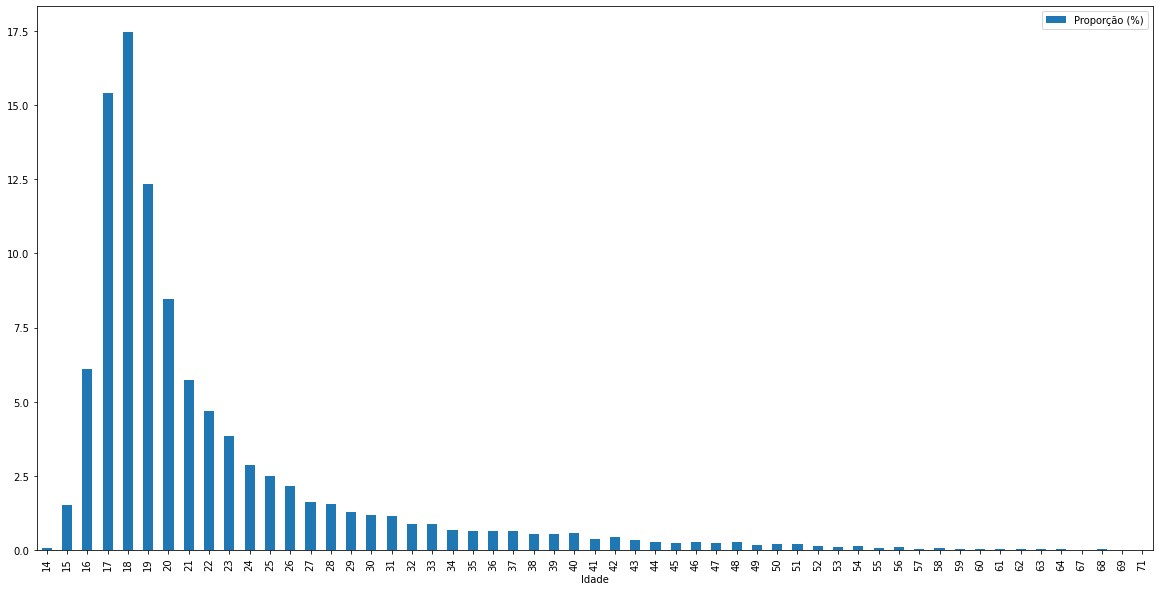

In [73]:
idade_normalizada_mg.plot.bar(y='Proporção (%)', figsize=(20,10))

In [75]:
idade_normalizada_mg.loc[17][0].round(2)

15.42

In [76]:
idade_normalizada_mg.loc[18][0].round(2)

17.46

In [77]:
idade_normalizada_mg.loc[19][0].round(2)

12.34

In [78]:
grupo_181719_mg = (idade_normalizada_mg.loc[17][0]+idade_normalizada_mg.loc[18][0]+idade_normalizada_mg.loc[19][0]).round(2)
grupo_181719_mg

45.22

Assim como na amostra com dados para todo o Brasil, em Minas os candidatos com 18, 17 e 19 anos representam a maior parte das pessoas que fizeram ENEM em 2019. No Brasil, a proporção para essas idades foi de, respectivamente, 16,84%, 16,68% e 11,31%. Em Minas, a proporção para essas idades foi de, respectivamente, 17,46%, 15,42% e 12,34%. No Brasil, esse grupo (canditatos com 17 ou 18 ou 19 anos) representa 44,85% de toda amostra. Em Minas, esse grupo representa 45,22% de toda amostra.

#### Distribuição das notas entre os candidatos mineiros:

Text(0.5, 1.0, 'Distribuição das notas dos candidatos da amostra - MG')

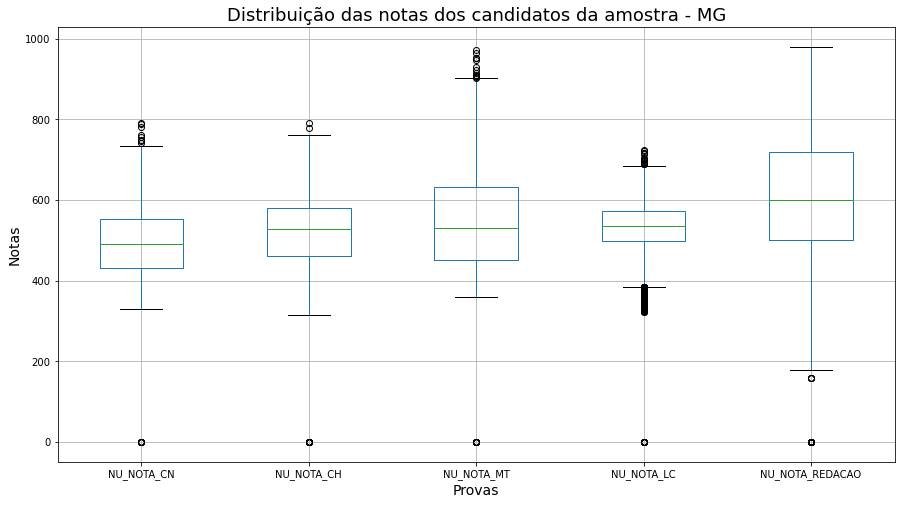

In [124]:
provas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO"]
dados.query("SG_UF_PROVA == 'MG'")[provas].plot.box(grid=True, figsize=(15,8)) 
plt.xlabel('Provas', fontdict={'fontsize':14})
plt.ylabel('Notas', fontdict={'fontsize':14})
plt.title('Distribuição das notas dos candidatos da amostra - MG', fontdict={'fontsize':18})

As notas das provas dos candidatos mineiros parecem estar distribuidas entre valores um pouco mais altos em comparação com os candidatos de todo o Brasil, o que indica que as notas dos mineiros podem ter sido melhores que a média brasileira.

#### Diferença entre a distribuição de frequências entre candidatos mineiros que são treineiros e não treineiros:

Text(0.5, 1.0, 'Frequência da Idade dos candidatos da amostra - Treineiros')

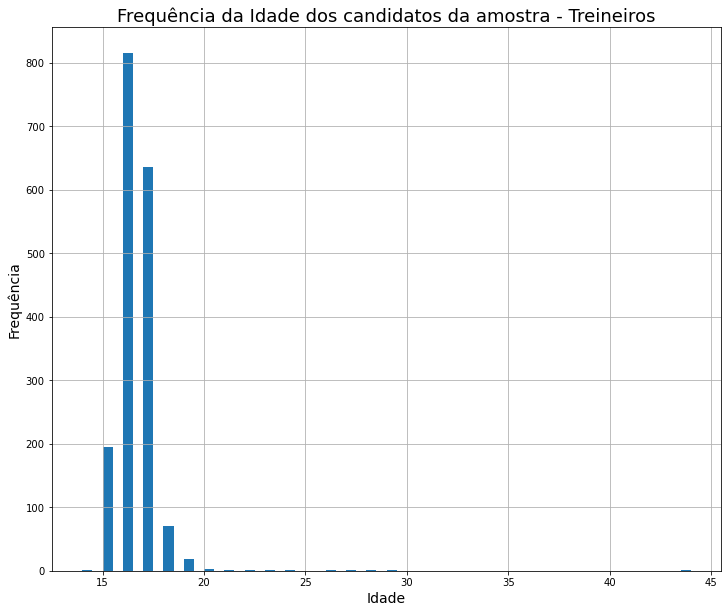

In [80]:
dados.query("IN_TREINEIRO == 1 & SG_UF_PROVA == 'MG'")["NU_IDADE"].hist(bins=60, figsize=(12,10))
plt.xlabel('Idade', fontdict={'fontsize':14})
plt.ylabel('Frequência', fontdict={'fontsize':14})
plt.title('Frequência da Idade dos candidatos da amostra - Treineiros - MG', fontdict={'fontsize':18})

Text(0.5, 1.0, 'Frequência da Idade dos candidatos da amostra - Não Treineiros - MG')

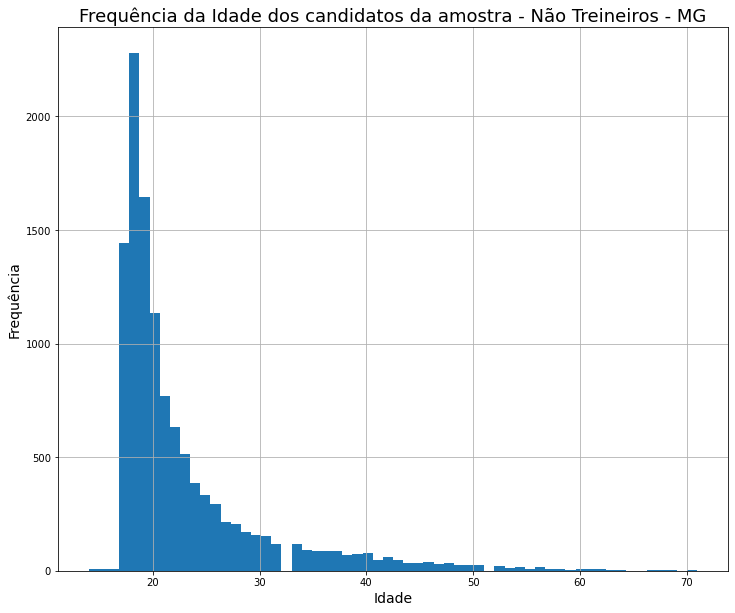

In [127]:
dados.query("IN_TREINEIRO == 0 & SG_UF_PROVA == 'MG'")["NU_IDADE"].hist(bins=60, figsize=(12,10))
plt.xlabel('Idade', fontdict={'fontsize':14})
plt.ylabel('Frequência', fontdict={'fontsize':14})
plt.title('Frequência da Idade dos candidatos da amostra - Não Treineiros - MG', fontdict={'fontsize':18})

Comparando a distribuição de frequências das idades entre candidatos treineiros e não treineiros em Minas e no Brasil, não parece haver diferenças significativas.

#### Diferença entre a nota de 'Linguagem e Códigos e suas Tecnologias' entre candidatos mineiros que fizeram prova de inglês e espanhol:

Text(0.5, 1.0, 'Distribuição das notas dos candidatos que escolheram fazer a prova de inglês - MG')

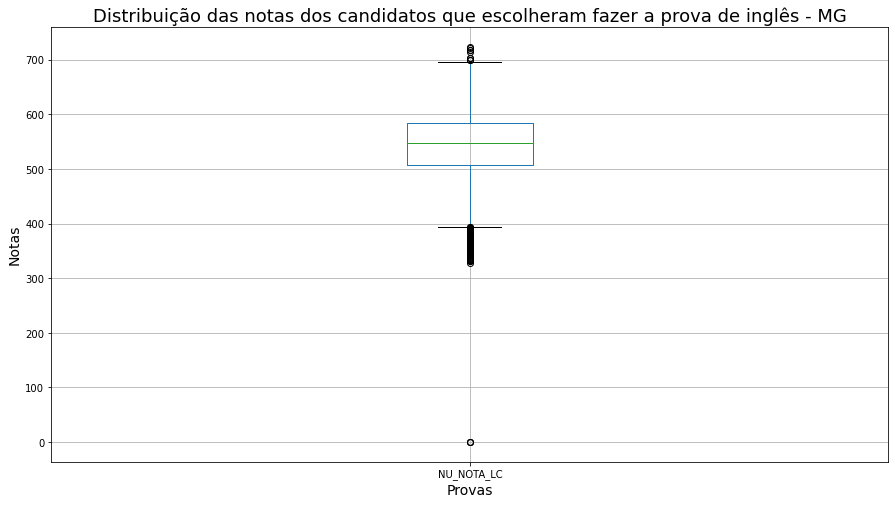

In [126]:
dados.query("TP_LINGUA == 0 & SG_UF_PROVA == 'MG'")['NU_NOTA_LC'].plot.box(grid=True, figsize=(15,8))

plt.xlabel('Provas', fontdict={'fontsize':14})
plt.ylabel('Notas', fontdict={'fontsize':14})
plt.title('Distribuição das notas dos candidatos que escolheram fazer a prova de inglês - MG', fontdict={'fontsize':18})

Text(0.5, 1.0, 'Distribuição das notas dos candidatos que escolheram fazer a prova de espanhol - MG')

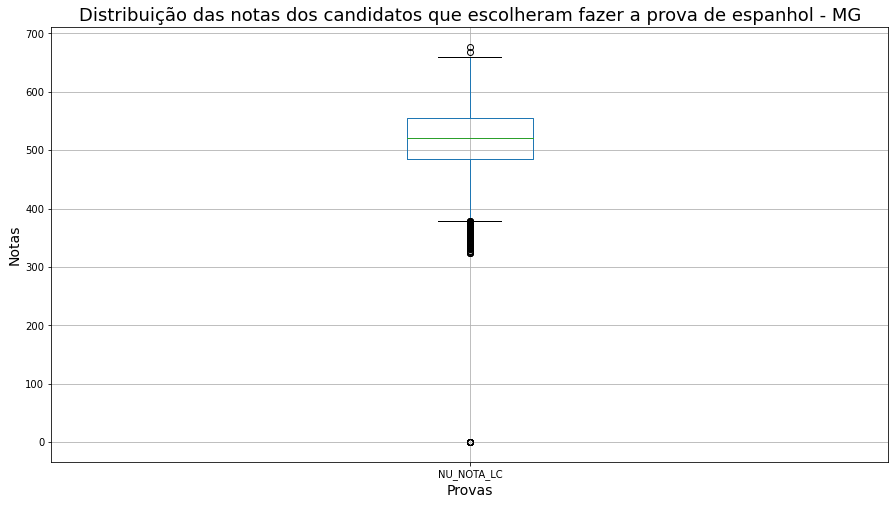

In [83]:
dados.query("TP_LINGUA == 1 & SG_UF_PROVA == 'MG'")['NU_NOTA_LC'].plot.box(grid=True, figsize=(15,8))

plt.xlabel('Provas', fontdict={'fontsize':14})
plt.ylabel('Notas', fontdict={'fontsize':14})
plt.title('Distribuição das notas dos candidatos que escolheram fazer a prova de espanhol - MG', fontdict={'fontsize':18})

Segundo os gráficos, assim como para a amostra com dados do Brasil, os candidatos mineiros que escolheram a prova de inglês acertaram mais questões do que os alunos que escolheram a prova de espanhol. Comparando apenas alunos que escolheram a prova de espanhol, aqueles que fizeram as provas em Minas tiveram notas melhores.

#### Notas e distribuição de renda entre os candidatos mineiros:

In [84]:
dados_mg_sem_zero = dados_sem_notas_zero.query("SG_UF_PROVA == 'MG'")

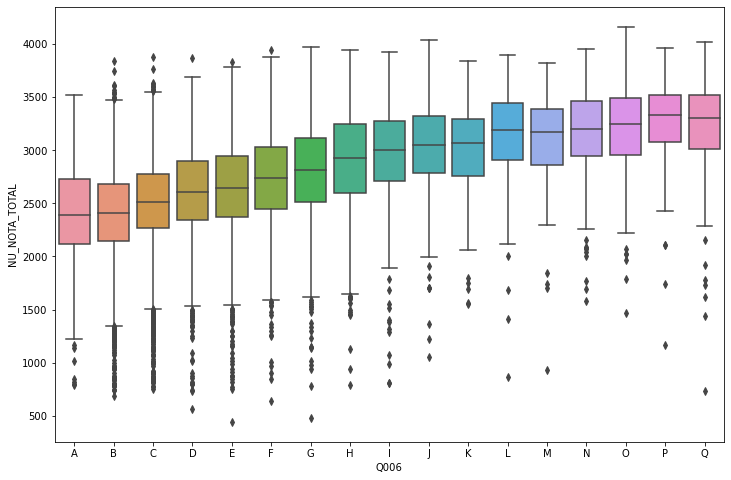

In [85]:
boxplot(x='Q006', y='NU_NOTA_TOTAL', data=dados_mg_sem_zero, order=renda_ordenada)

O padrão visualizado no gráfico das notas conforme a renda permanece para os dados em Minas: quanto mais baixa a renda de um candidato, menor é sua nota. Apesar disso, existem duas diferenças entre o gráfico com dados nacionais: a primeira é que as notas são 'mais distribuídas' entre as classes mais baixas; a segunda é que a partir da faixa de renda N (renda mensal familiar de 9.980,01 reais) a distribuição não apresenta grandes diferenças.

#### Participação e distribuição de renda entre os candidatos mineiros treineiros e não treineiros:

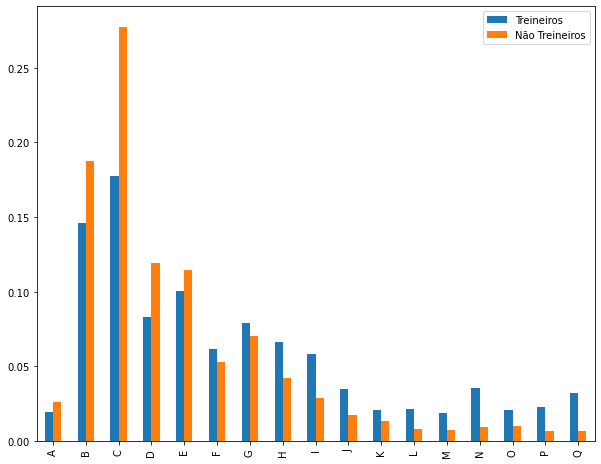

In [86]:
dados_treineiro_mg = dados.query("IN_TREINEIRO ==1 & SG_UF_PROVA == 'MG'")['Q006'].value_counts(normalize=True)
dados_nao_treineiro_mg = dados.query("IN_TREINEIRO ==0 & SG_UF_PROVA == 'MG'")['Q006'].value_counts(normalize=True)

treineiros_df_mg = pd.DataFrame({'Treineiros': dados_treineiro_mg,
                              'Não Treineiros': dados_nao_treineiro_mg})

treineiros_df_mg.plot.bar(figsize=(10,8))

Assim como nos dados da amostra para todo o Brasil, o número de candidatos não treineiros é maior nas classes sociais A, B, C, D e E (renda familiar abaixo de 2.495,00 reais). Entre as classes F, G, H, I, J, K, L, M, N, O, P, Q (renda familiar acima de 2.495,00 reais), há um número maior de candidatos treineiros. A mesma conclusão atribuída para dados do Brasil pode ser dada para os dados com candidatos mineiros. Como o exame para treineiros é pago, esse resultado pode estar ligado ao nível de renda familiar: se a renda é alta, a família detêm mais recursos que podem ser investidos em educação, especificamente no caso desse gráfico, os pais podem pagar para filhos que não estão no 3º ano do Ensino Médio fazerem a prova.

#### Acesso dos candidatos mineiros à internet:

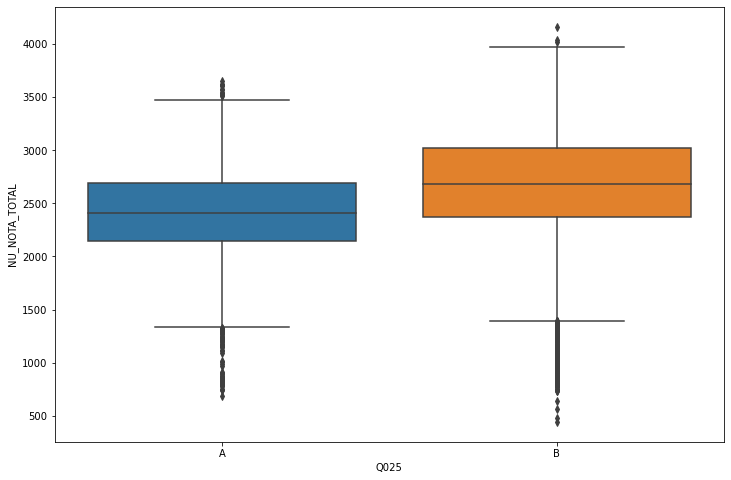

In [87]:
internet_ordenada = dados["Q025"].unique() # Criando uma lista com faixas de renda ordenadas para serem incluídas na função.
internet_ordenada.sort()
internet_ordenada

boxplot(x='Q025', y='NU_NOTA_TOTAL', data=dados_mg_sem_zero, order=internet_ordenada)

Da mesma forma que na análise com dados de candidatos de toda parte do Brasil, em Minas, as notas daqueles que têm acesso a internet são maiores do que os que não têm. A mesma discussão feita acima para o Brasil também pode ser feita para Minas: pode ser que haja um reforço da desigualdade na aplicação das provas esse ano: pessoas com baixa renda têm internet de baixa qualidade, por conta disso se preparam mal para as provas e tiram notas menores comparado aos candidatos com renda familiar maior. Com notas menores, acabam entrando em faculdades piores ou nem entrando na graduação. Se considerarmos que o acesso ao terceiro grau de ensino é um fator que interfere na renda futura pode ser que a renda familiar desses candidatos que hoje tem renda baixa continue sendo baixa daqui a alguns anos.

#### Média, mediana e moda das notas das provas dos candidatos mineiros:

In [88]:
total_media_mg = dados_mg_sem_zero['NU_NOTA_TOTAL'].mean()
total_mediana_mg = dados_mg_sem_zero['NU_NOTA_TOTAL'].median()
total_moda_mg = dados_mg_sem_zero['NU_NOTA_TOTAL'].mode()

In [89]:
total_media_mg

2631.016666666668

In [90]:
total_mediana_mg

2638.2

In [91]:
total_moda_mg

0    2360.2
1    2435.5
2    2652.5
dtype: float64

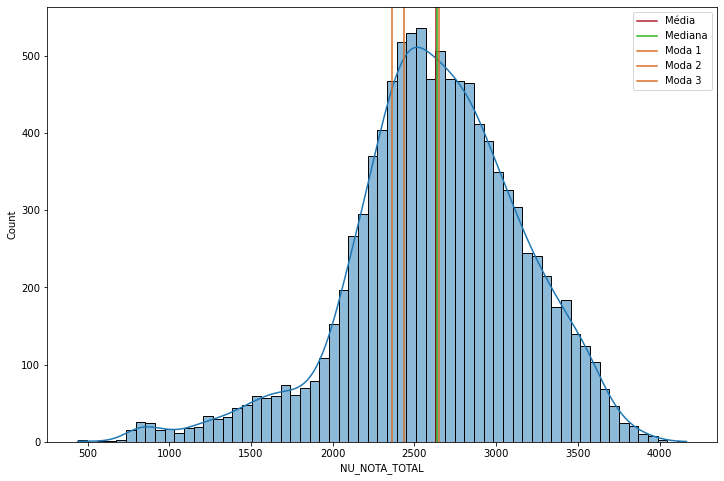

In [98]:
plt.figure(figsize=(12,8))
sns.histplot(dados_mg_sem_zero['NU_NOTA_TOTAL'], kde=True)
plt.axvline(x=total_media_mg, color='#B41F2C', label='Média')
plt.axvline(x=total_mediana_mg, color='#2CB41F', label='Mediana')
plt.axvline(x=total_moda_mg[0], color='#D86F25', label='Moda 1')
plt.axvline(x=total_moda_mg[1], color='#D86F25', label='Moda 2')
plt.axvline(x=total_moda_mg[2], color='#D86F25', label='Moda 3')
plt.legend()

Em Minas, a média das notas totais foi igual a 2631,01, valor maior que a média total nacional (2542,3). O valor da mediana foi maior do que a média e maior que a mediana nacional. Três valores são considerados como moda nessa variável, 2360,2, 2435,5, 2652,5, isto é, pode-se considerar essa variável como multimodal.

In [93]:
cn_media_mg = dados_mg_sem_zero['NU_NOTA_CN'].mean()
cn_mediana_mg = dados_mg_sem_zero['NU_NOTA_CN'].median()
cn_moda_mg = dados_mg_sem_zero['NU_NOTA_CN'].mode()

In [94]:
cn_media_mg

493.24570791527253

In [95]:
cn_mediana_mg

490.1

In [96]:
cn_moda_mg

0    433.5
1    502.0
dtype: float64

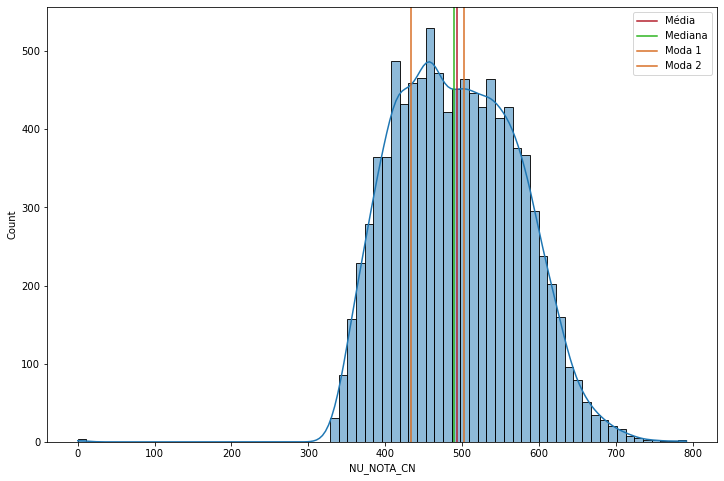

In [100]:
plt.figure(figsize=(12,8))
sns.histplot(dados_mg_sem_zero['NU_NOTA_CN'], kde=True)
plt.axvline(x=cn_media_mg, color='#B41F2C', label='Média')
plt.axvline(x=cn_mediana_mg, color='#2CB41F', label='Mediana')
plt.axvline(x=cn_moda_mg[0], color='#D86F25', label='Moda 1')
plt.axvline(x=cn_moda_mg[1], color='#D86F25', label='Moda 2')
plt.legend()

A média das notas da prova de 'Ciência da Natureza e suas Tecnologias' foi igual a 493,24. O valor da mediana foi igual a 490,1. A variável apresenta dois valores para moda: 433,5 e 502. Todas essas medidas foram maiores em comparação com as medidas da amostra com todo o Brasil.

In [101]:
ch_media_mg = dados_mg_sem_zero['NU_NOTA_CH'].mean()
ch_mediana_mg = dados_mg_sem_zero['NU_NOTA_CH'].median()
ch_moda_mg = dados_mg_sem_zero['NU_NOTA_CH'].mode()

In [102]:
ch_media_mg

520.9540603024733

In [103]:
ch_mediana_mg

527.3

In [104]:
ch_moda_mg

0      0.0
1    541.3
2    567.9
dtype: float64

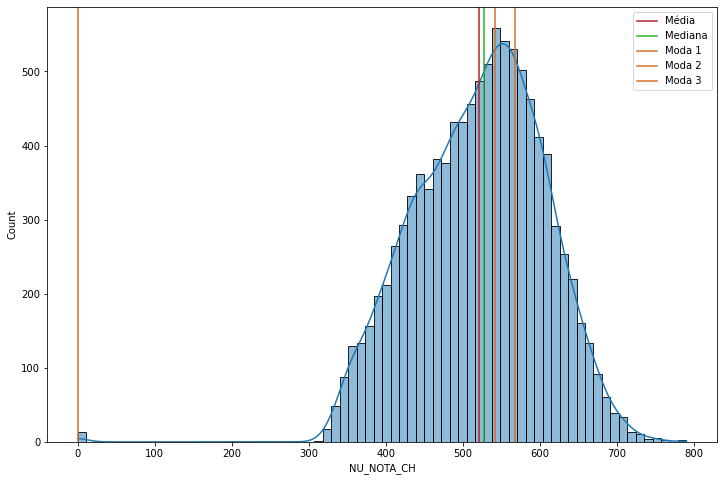

In [106]:
plt.figure(figsize=(12,8))
sns.histplot(dados_mg_sem_zero['NU_NOTA_CH'], kde=True)
plt.axvline(x=ch_media_mg, color='#B41F2C', label='Média')
plt.axvline(x=ch_mediana_mg, color='#2CB41F', label='Mediana')
plt.axvline(x=ch_moda_mg[0], color='#D86F25', label='Moda 1')
plt.axvline(x=ch_moda_mg[1], color='#D86F25', label='Moda 2')
plt.axvline(x=ch_moda_mg[2], color='#D86F25', label='Moda 3')
plt.legend()

A média das notas da prova de 'Ciências Humanas e suas Tecnologias' foi igual a 520,95. O valor da mediana foi igual a 527,3. O valor da moda foi igual a 0, 541,3 e 567,9. Todos os valores para essa prova são maiores que os valores nacionais.

In [107]:
mt_media_mg = dados_mg_sem_zero['NU_NOTA_MT'].mean()
mt_mediana_mg = dados_mg_sem_zero['NU_NOTA_MT'].median()
mt_moda_mg = dados_mg_sem_zero['NU_NOTA_MT'].mode()

In [108]:
mt_media_mg

546.7575352184049

In [109]:
mt_mediana_mg

530.9

In [110]:
mt_moda_mg

0    404.5
1    427.4
2    433.9
3    436.6
4    476.9
5    483.9
6    577.8
7    631.4
dtype: float64

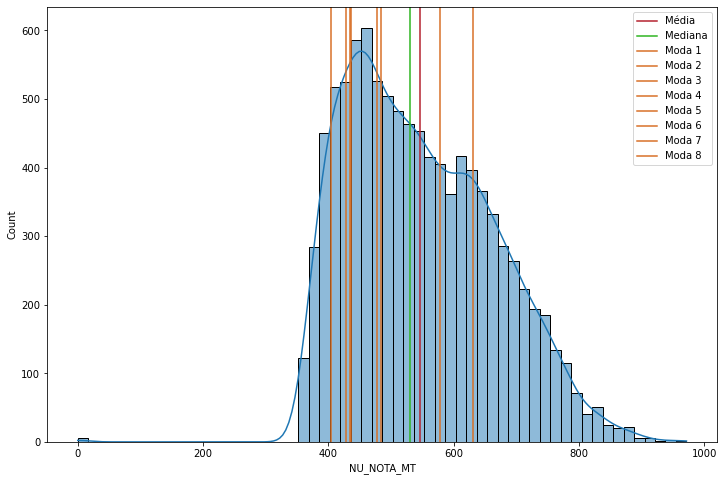

In [112]:
plt.figure(figsize=(12,8))
sns.histplot(dados_mg_sem_zero['NU_NOTA_MT'], kde=True)
plt.axvline(x=mt_media_mg, color='#B41F2C', label='Média')
plt.axvline(x=mt_mediana_mg, color='#2CB41F', label='Mediana')
plt.axvline(x=mt_moda_mg[0], color='#D86F25', label='Moda 1')
plt.axvline(x=mt_moda_mg[1], color='#D86F25', label='Moda 2')
plt.axvline(x=mt_moda_mg[2], color='#D86F25', label='Moda 3')
plt.axvline(x=mt_moda_mg[3], color='#D86F25', label='Moda 4')
plt.axvline(x=mt_moda_mg[4], color='#D86F25', label='Moda 5')
plt.axvline(x=mt_moda_mg[5], color='#D86F25', label='Moda 6')
plt.axvline(x=mt_moda_mg[6], color='#D86F25', label='Moda 7')
plt.axvline(x=mt_moda_mg[7], color='#D86F25', label='Moda 8')
plt.legend()

A média das notas da prova de 'Matemática e suas Tecnologias' foi igual a 546,75. O valor da mediana foi igual a 530,9. Existem vários valores para a moda: 404,5, 427,4, 433,9, 436,6, 476,9, 483,9, 577,8, 631,4. Todos os valores para essa prova são maiores que os valores nacionais.

In [113]:
lc_media_mg = dados_mg_sem_zero['NU_NOTA_LC'].mean()
lc_mediana_mg = dados_mg_sem_zero['NU_NOTA_LC'].median()
lc_moda_mg = dados_mg_sem_zero['NU_NOTA_LC'].mode()

In [114]:
lc_media_mg

530.7986995472502

In [115]:
lc_mediana_mg

535.6

In [116]:
lc_moda_mg

0    515.8
1    524.4
dtype: float64

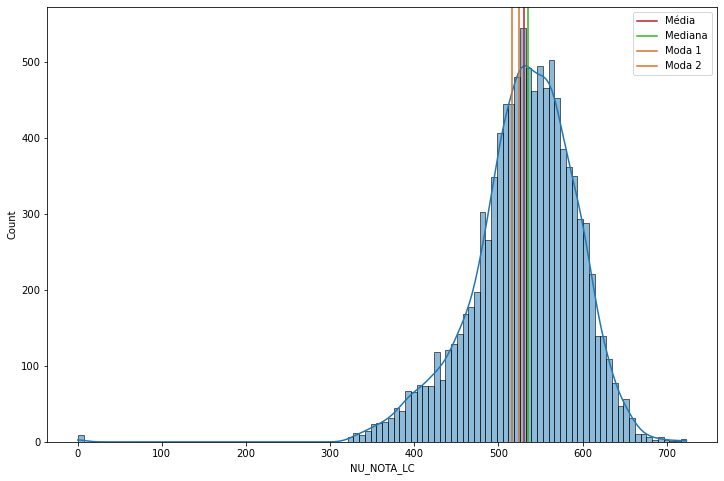

In [117]:
plt.figure(figsize=(12,8))
sns.histplot(dados_mg_sem_zero['NU_NOTA_LC'], kde=True)
plt.axvline(x=lc_media_mg, color='#B41F2C', label='Média')
plt.axvline(x=lc_mediana_mg, color='#2CB41F', label='Mediana')
plt.axvline(x=lc_moda_mg[0], color='#D86F25', label='Moda 1')
plt.axvline(x=lc_moda_mg[1], color='#D86F25', label='Moda 2')
plt.legend()

A média das notas da prova de 'Linguagens, Códigos e suas Tecnologias' foi igual a 530,79. O valor da mediana foi igual a 535,6. Os valores para a moda foram iguais a 515,8 e 524,4. Os valores da média e mediana foram maiores que os valores nacionais.

In [118]:
redacao_media_mg = dados_mg_sem_zero['NU_NOTA_REDACAO'].mean()
redacao_mediana_mg = dados_mg_sem_zero['NU_NOTA_REDACAO'].median()
redacao_moda_mg = dados_mg_sem_zero['NU_NOTA_REDACAO'].mode()

In [119]:
redacao_media_mg

596.5841441094307

In [120]:
redacao_mediana_mg

600.0

In [121]:
redacao_moda_mg

0    600.0
dtype: float64

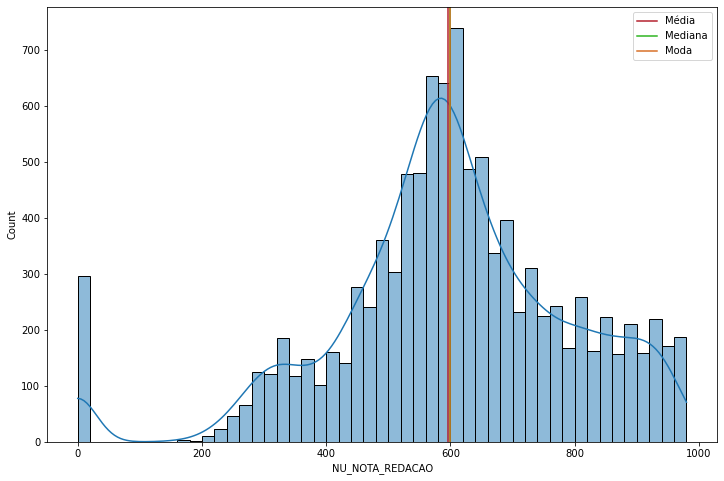

In [123]:
plt.figure(figsize=(12,8))
sns.histplot(dados_mg_sem_zero['NU_NOTA_REDACAO'], kde=True)
plt.axvline(x=redacao_media_mg, color='#B41F2C', label='Média')
plt.axvline(x=redacao_mediana_mg, color='#2CB41F', label='Mediana')
plt.axvline(x=redacao_moda_mg[0], color='#D86F25', label='Moda')
plt.legend()

A média das notas da 'Redação' foi igual a 596,5. O valor da mediana foi igual a 600. O valor da moda foi igual a 600. Esses valores são maiores que os encontrados para a média, mediana e moda das notas da redação de todo país. Apesar de o valor da média ser menor que a mediana que tem valor menor que a moda, não é possível afirmar com certeza a forma que as notas se distribuem (simétrica, assimétrica à esquerda ou assimétrica a direita).

### 4 - Pensar sobre o que causa a correlação positiva entre notas de matemática e linguagens.

Possivelmente esse resultado está ligado com o tempo dedicado ao estudo pelo indivíduo. Pessoas que estudam bastante para fazer uma boa prova de matemática também estudam bastante para fazer uma boa prova de linguagens. Por outro lado, pessoas que não estudaram tanto para fazer uma das provas também não estudou para fazer a outra.